In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Linearly Polarized

In [31]:
def e_complex(Eo, omega, k, phi, z, t):
    return Eo * np.exp(1j*phi) * np.exp(1j*k*z) * np.exp(1j*omega*t)

def e_real(Eo, omega, k, phi, z, t):
    return Eo*np.cos(omega*t - k*z + phi)

def e_real_tavg(Eo, omega, k, phi, z, t):
    T = 2*np.pi/omega
    return (Eo/(omega*T))*(np.sin(2*np.pi - k*z + phi) - np.sin(-k*z + phi))

def e_real_sq_tavg(Eo, omega, k, phi, z, t):
    T = 2*np.pi/omega
    return (Eo**2/(2*T*omega))*(2*np.pi + .5*(np.sin(4*np.pi - 2*k*z + 2*phi) - np.sin(-2*k*z + 2*phi)))

Assume normally incident plane wave light linearly polarized along the x direction. Then

\begin{equation}
    \mathbf{E}(z, t) = (E_x(z, t), 0, 0)
\end{equation}

In [32]:
k = 1
omega = 1
t = 0
z = np.linspace(0, 2*np.pi, 100)
Eo = 1
phi = 0
Ex_comp = e_complex(Eo, omega, k, phi, z, t)
Ex_real = e_real(Eo, omega, k, phi, z, t)
Ex_real_tavg = e_real_tavg(Eo, omega, k, phi, z, t)
Ex_real_sq_tavg = e_real_sq_tavg(Eo, omega, k, phi, z, t)

# New heading

/home/kyle_robertson/.virtualenvs/nanowire/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


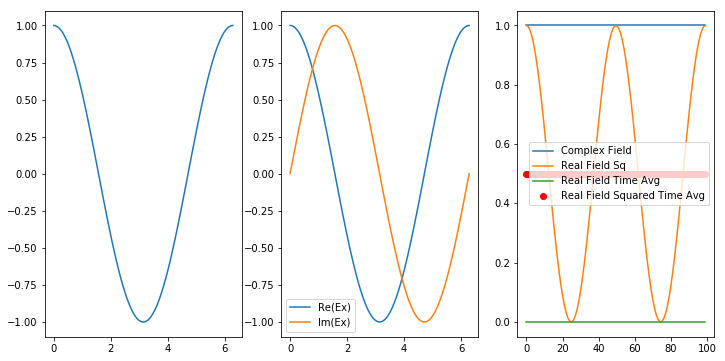

In [34]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))
ax1.plot(z, Ex_real)
ax2.plot(z, Ex_comp.real, label='Re(Ex)')
ax2.plot(z, Ex_comp.imag, label='Im(Ex)')
ax2.legend()
ax3.plot(Ex_comp*np.conj(Ex_comp), label='Complex Field')
ax3.plot(Ex_real*Ex_real, label='Real Field Sq')
ax3.plot(Ex_real_tavg, label='Real Field Time Avg')
ax3.plot(Ex_real_sq_tavg, 'ro', label='Real Field Squared Time Avg')
ax3.legend()
plt.show()